# A SF Permits Cleaning

4 points  
Download the Building_Permits.csv from Kaggle  
Clean the San Francisco Building permit dataset  
Use imputation were necessary  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# load San Francisco Building Permits into a pandas dataframe
sanfrancisco_df = pd.read_csv("./Building_Permits.csv")

# preview
sanfrancisco_df.head(5)

c:\users\d074009\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


### Data Quality & Missing Value Assessment
Um einen Überblick über die Daten zu bekommen, lassen wir uns ausgeben wie hoch der Anteil an fehlenden Werten ist.

In [3]:
n_total = len(sanfrancisco_df)

round(sanfrancisco_df.isnull().sum() / n_total * 100, 2)

Permit Number                               0.00
Permit Type                                 0.00
Permit Type Definition                      0.00
Permit Creation Date                        0.00
Block                                       0.00
Lot                                         0.00
Street Number                               0.00
Street Number Suffix                       98.89
Street Name                                 0.00
Street Suffix                               1.39
Unit                                       85.18
Unit Suffix                                99.01
Description                                 0.15
Current Status                              0.00
Current Status Date                         0.00
Filed Date                                  0.00
Issued Date                                 7.51
Completed Date                             51.14
First Construction Document Date            7.51
Structural Notification                    96.52
Number of Existing S

Exploring the dataset in Excel, we discovered that sometimes there is only used a "Y" to symbolize true and empty to symbolize false. We decided to use 1 for "Y"/true and 0 for empty/false.  
Affected columns are:  
- Structural Notification
- Voluntary Soft-Story Retrofit
- Fire Only Permit
- TIDF Compliance (but only two rows contain values, therefore we will drop the column)
- Site Permit

In [4]:
def replace_y_with_0_1(df: pd.DataFrame, column: str):
    """
    Ersetzt Y und leere Felder in Spalten die nur Y und leere Felder erhalten durch 1 und 0 
    :param df: Dataframe in dem sich die Spalten befinden
    :param column: Name der Spalte in der die Werte ersetzt werden sollen
    :return: DataFrame mit modifizierten Spalten
    """
    df[column].fillna(0, inplace=True)
    df[column].replace('Y', 1, inplace=True)

In [5]:
sanfrancisco_df.drop("TIDF Compliance", axis=1, inplace=True)

replace_y_with_0_1(sanfrancisco_df, "Structural Notification")
replace_y_with_0_1(sanfrancisco_df, "Voluntary Soft-Story Retrofit")
replace_y_with_0_1(sanfrancisco_df, "Fire Only Permit")
replace_y_with_0_1(sanfrancisco_df, "Site Permit")

Da wir mit dem `Supervisor District` bereits eine geografische Einteilung in Regionen haben, entfernen wir alle Adressdaten und die Koordinaten, da wir die für unsere Vorhersage in Textform nicht gebrauchen können und One-Hot-Encoding keinen Sinn macht:
- Block
- Lot
- Street Number
- Street Number Suffix
- Street Name
- Street Suffix
- Unit
- Unit Suffix
- Neighborhoods - Analysis Boundaries
- Zipcode
- Location

Außerdem entfernen wir Felder die Freitext enthalten:
- Description
- Existing Use
- Proposed Use

In [6]:
sanfrancisco_df.drop("Block", axis=1, inplace=True)
sanfrancisco_df.drop("Lot", axis=1, inplace=True)
sanfrancisco_df.drop("Street Number", axis=1, inplace=True)
sanfrancisco_df.drop("Street Number Suffix", axis=1, inplace=True)
sanfrancisco_df.drop("Street Name", axis=1, inplace=True)
sanfrancisco_df.drop("Street Suffix", axis=1, inplace=True)
sanfrancisco_df.drop("Unit", axis=1, inplace=True)
sanfrancisco_df.drop("Unit Suffix", axis=1, inplace=True)
sanfrancisco_df.drop("Neighborhoods - Analysis Boundaries", axis=1, inplace=True)
sanfrancisco_df.drop("Zipcode", axis=1, inplace=True)
sanfrancisco_df.drop("Location", axis=1, inplace=True)

sanfrancisco_df.drop("Description", axis=1, inplace=True)
sanfrancisco_df.drop("Existing Use", axis=1, inplace=True)
sanfrancisco_df.drop("Proposed Use", axis=1, inplace=True)

Und alle Zeilen die keinen `Supervisor District` haben werden entfernt da wir die Zeilen nicht manuell den Distrikten zuordnen können.

In [7]:
sanfrancisco_df = sanfrancisco_df[sanfrancisco_df["Supervisor District"].notna()]

For:
- Number of Existing Stories
- Number of Proposed Stories
- Existing Units
- Proposed Units

we are going to fill empty values with zeros because we may look at the difference between before/after values and filling the values with zeros won't damage the results but ease calculation later on.

In [8]:
sanfrancisco_df["Number of Existing Stories"].fillna(0, inplace=True)
sanfrancisco_df["Number of Proposed Stories"].fillna(0, inplace=True)
sanfrancisco_df["Existing Units"].fillna(0, inplace=True)
sanfrancisco_df["Proposed Units"].fillna(0, inplace=True)

We will drop:
- Existing Construction Type
- Proposed Construction Type

and will use the corresponding Description columns for one-hot encoding later.  
We will fill the missing values with "no constr type 0".

In [9]:
sanfrancisco_df.drop("Existing Construction Type", axis=1, inplace=True)
sanfrancisco_df.drop("Proposed Construction Type", axis=1, inplace=True)
sanfrancisco_df["Existing Construction Type Description"].fillna("no constr type 0", inplace=True)
sanfrancisco_df["Proposed Construction Type Description"].fillna("no constr type 0", inplace=True)

In [10]:
round(sanfrancisco_df.isnull().sum() / n_total * 100, 2)

Permit Number                              0.00
Permit Type                                0.00
Permit Type Definition                     0.00
Permit Creation Date                       0.00
Current Status                             0.00
Current Status Date                        0.00
Filed Date                                 0.00
Issued Date                                7.48
Completed Date                            50.65
First Construction Document Date           7.48
Structural Notification                    0.00
Number of Existing Stories                 0.00
Number of Proposed Stories                 0.00
Voluntary Soft-Story Retrofit              0.00
Fire Only Permit                           0.00
Permit Expiration Date                    25.75
Estimated Cost                            18.83
Revised Cost                               3.04
Existing Units                             0.00
Proposed Units                             0.00
Plansets                                

We are going to use median values for imputation on:
- Estimated Cost
- Revised Cost
- Plansets

In [11]:
def replace_with_median(df: pd.DataFrame, column: str):
    median = df[column].median(skipna=True)
    df[column].fillna(median, inplace=True)

In [12]:
replace_with_median(sanfrancisco_df, "Estimated Cost")
replace_with_median(sanfrancisco_df, "Revised Cost")
replace_with_median(sanfrancisco_df, "Plansets")

In [13]:
round(sanfrancisco_df.isnull().sum() / n_total * 100, 2)

Permit Number                              0.00
Permit Type                                0.00
Permit Type Definition                     0.00
Permit Creation Date                       0.00
Current Status                             0.00
Current Status Date                        0.00
Filed Date                                 0.00
Issued Date                                7.48
Completed Date                            50.65
First Construction Document Date           7.48
Structural Notification                    0.00
Number of Existing Stories                 0.00
Number of Proposed Stories                 0.00
Voluntary Soft-Story Retrofit              0.00
Fire Only Permit                           0.00
Permit Expiration Date                    25.75
Estimated Cost                             0.00
Revised Cost                               0.00
Existing Units                             0.00
Proposed Units                             0.00
Plansets                                

The other missing values are dates about the building progress. We will fill in the missing values with `00/00/0000` to symbolize them as missing values.

In [14]:
sanfrancisco_df["Issued Date"].fillna("00/00/0000", inplace=True)
sanfrancisco_df["Completed Date"].fillna("00/00/0000", inplace=True)
sanfrancisco_df["First Construction Document Date"].fillna("00/00/0000", inplace=True)
sanfrancisco_df["Permit Expiration Date"].fillna("00/00/0000", inplace=True)

In [15]:
round(sanfrancisco_df.isnull().sum() / n_total * 100, 2)

Permit Number                             0.0
Permit Type                               0.0
Permit Type Definition                    0.0
Permit Creation Date                      0.0
Current Status                            0.0
Current Status Date                       0.0
Filed Date                                0.0
Issued Date                               0.0
Completed Date                            0.0
First Construction Document Date          0.0
Structural Notification                   0.0
Number of Existing Stories                0.0
Number of Proposed Stories                0.0
Voluntary Soft-Story Retrofit             0.0
Fire Only Permit                          0.0
Permit Expiration Date                    0.0
Estimated Cost                            0.0
Revised Cost                              0.0
Existing Units                            0.0
Proposed Units                            0.0
Plansets                                  0.0
Existing Construction Type Descrip

# B SF Permits Exploration

6 points  
Explore the data. Which columns correlate strongly with the "Current Status" column? How do other
columns correlate to each other?  
Describe problems with "Current Status" as a target column to predict. Can you construct a better
target column?  

### Exploration of Current Status
Um eine Idee davon zu bekommen wie stark die einzelnen Spalten von einander abhängen berrechnen wir eine Korrelationsmatrix. Je näher die Werte an 1/-1 liegen desto stärker ist die Abhängigkeit.

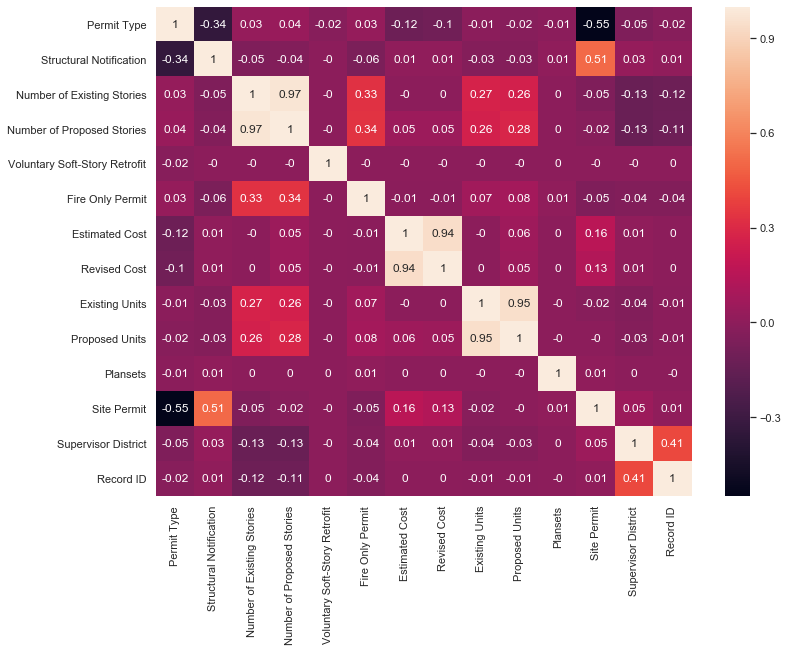

In [16]:
correlation_matrix = sanfrancisco_df.corr().round(2)
sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(data=correlation_matrix, annot=True)